In [76]:
sns.set_style("white")

### 점수에서 눈에 띄는 차이가 없었기에.. 인코딩만 한 버전으로 진행한다.

In [1]:
hr = pd.read_csv('datas/hr_raw.csv', index_col=0)
hr.head()

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,2,1,2,2,3,2,4,5993,8,...,0,0,0,0,0,1,0,0,0,1
1,49,1,8,1,3,2,2,2,5130,1,...,0,0,0,0,1,0,0,0,1,0
2,37,2,2,2,4,2,1,3,2090,6,...,1,0,0,0,0,0,0,0,0,1
3,33,1,3,4,4,3,1,3,2909,1,...,0,0,0,0,1,0,0,0,1,0
4,27,2,2,1,1,3,1,2,3468,9,...,1,0,0,0,0,0,0,0,1,0


In [2]:
X = hr.drop(columns=['MonthlyIncome'])
y = hr.MonthlyIncome

In [5]:
feature_columns = list(hr.columns.difference(['MonthlyIncome']))

In [6]:
# 훈련용과 테스트용으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 40), (294, 40), (1176,), (294,))

# rev. ver.
- 0328

## k-Fold 교차 검증

In [48]:
from sklearn.model_selection import cross_val_score

#### 1. RMSE

In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('LGBMRegressor', LGBMRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))

In [87]:
from sklearn.model_selection import KFold, cross_val_score, KFold

results_rmse = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=4, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train,
                                cv=kfold, scoring='neg_mean_squared_error')
    model_rmse_scores = np.sqrt(-cv_results)
    results_rmse.append(model_rmse_scores)
    names.append(name)
    
    print(name, model_rmse_scores.mean(), model_rmse_scores.std())

LinearRegression 1164.0852620090604 35.99689615880381
RandomForestRegressor 1046.2501435567578 52.077511914061226
GradientBoostingRegressor 1029.336297430589 63.03971373935202
XGBRegressor 1143.0869491375056 74.68272547860053
LGBMRegressor 1122.6929201304638 44.59413405322709
Ridge 1164.3202646807363 37.41649336967019
Lasso 1163.0565102475862 36.07163823317657


In [88]:
results_rmse

[array([1190.31978823, 1218.97243881, 1146.20450753, 1117.32213348,
        1147.607442  ]),
 array([1064.11166658, 1140.19569133, 1021.65736564, 1000.69811693,
        1004.5878773 ]),
 array([1070.57258737, 1126.69639914, 1019.56318795,  952.73093164,
         977.11838104]),
 array([1158.46384952, 1280.15443194, 1118.74760322, 1073.30078108,
        1084.76807993]),
 array([1100.10189927, 1208.59508853, 1095.40257592, 1122.8502808 ,
        1086.51475613]),
 array([1192.94378696, 1221.99121005, 1142.03524473, 1119.87570358,
        1144.75537809]),
 array([1190.13771396, 1218.14075327, 1143.89551349, 1117.65777771,
        1145.45079279])]

In [110]:
rmse_df = pd.DataFrame(results_rmse, index=names).T
rmse_df

,LinearRegression,RandomForestRegressor,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Ridge,Lasso
0,1190.319788,1064.111667,1070.572587,1158.463850,1100.101899,1192.943787,1190.137714
1,1218.972439,1140.195691,1126.696399,1280.154432,1208.595089,1221.991210,1218.140753
2,1146.204508,1021.657366,1019.563188,1118.747603,1095.402576,1142.035245,1143.895513
3,1117.322133,1000.698117,952.730932,1073.300781,1122.850281,1119.875704,1117.657778
4,1147.607442,1004.587877,977.118381,1084.768080,1086.514756,1144.755378,1145.450793


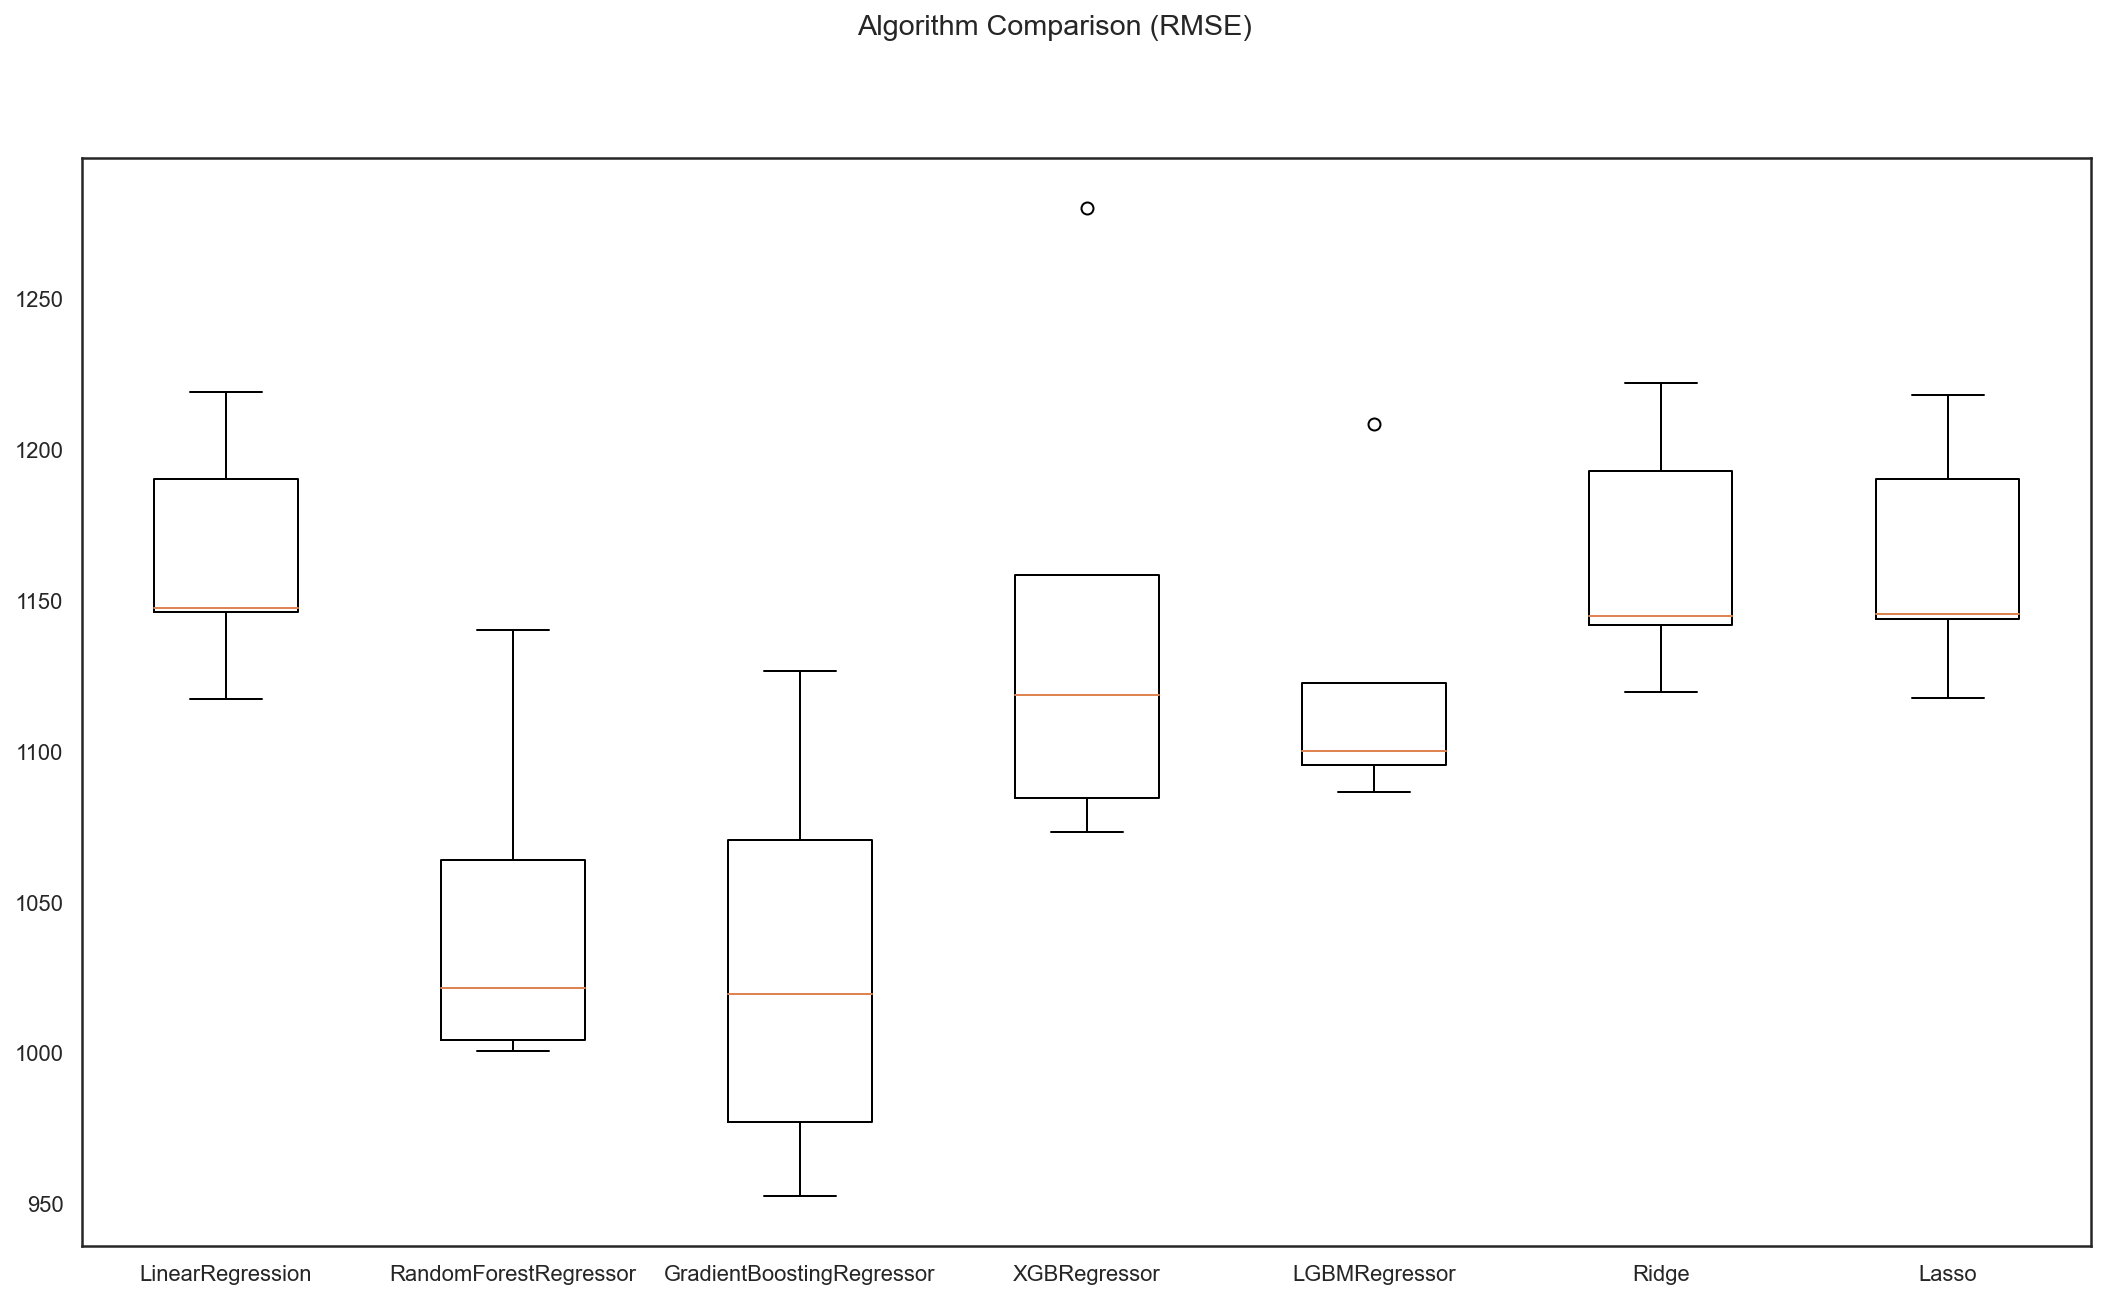

In [102]:
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Algorithm Comparison (RMSE)')
ax = fig.add_subplot(111)
plt.boxplot(results_rmse)
ax.set_xticklabels(names)
plt.show()

#### 2. R2

In [79]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('LGBMRegressor', LGBMRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))

In [83]:
from sklearn.model_selection import KFold, cross_val_score, KFold

results_r2 = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=4, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train,
                                cv=kfold, scoring='r2')
    results_r2.append(cv_results)
    names.append(name)
    
    print(name, cv_results.mean(), cv_results.std())

LinearRegression 0.93711000217149 0.004526416893118926
RandomForestRegressor 0.9494482763517936 0.002495384930628092
GradientBoostingRegressor 0.951118757368939 0.0013091386331298346
XGBRegressor 0.9396144548634944 0.003254357547407612
LGBMRegressor 0.9413906833362538 0.00583471535214719
Ridge 0.9370994394309496 0.0043822930307516085
Lasso 0.9372238478825988 0.004483171565890097


In [84]:
results_r2

[array([0.94196366, 0.94148507, 0.93808409, 0.93384509, 0.9301721 ]),
 array([0.95278145, 0.94795905, 0.9516154 , 0.9490343 , 0.94585118]),
 array([0.95309052, 0.95039767, 0.95100013, 0.95187684, 0.94922862]),
 array([0.94502849, 0.93546377, 0.94101491, 0.93895527, 0.93760984]),
 array([0.95042776, 0.94247713, 0.94345092, 0.93318885, 0.93740876]),
 array([0.9417075 , 0.94119489, 0.9385337 , 0.93354236, 0.93051874]),
 array([0.94198141, 0.94156489, 0.9383333 , 0.93380534, 0.9304343 ])]

In [111]:
r2_df = pd.DataFrame(results_r2, index=names).T
r2_df

,LinearRegression,RandomForestRegressor,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Ridge,Lasso
0,0.941964,0.952781,0.953091,0.945028,0.950428,0.941707,0.941981
1,0.941485,0.947959,0.950398,0.935464,0.942477,0.941195,0.941565
2,0.938084,0.951615,0.951000,0.941015,0.943451,0.938534,0.938333
3,0.933845,0.949034,0.951877,0.938955,0.933189,0.933542,0.933805
4,0.930172,0.945851,0.949229,0.937610,0.937409,0.930519,0.930434


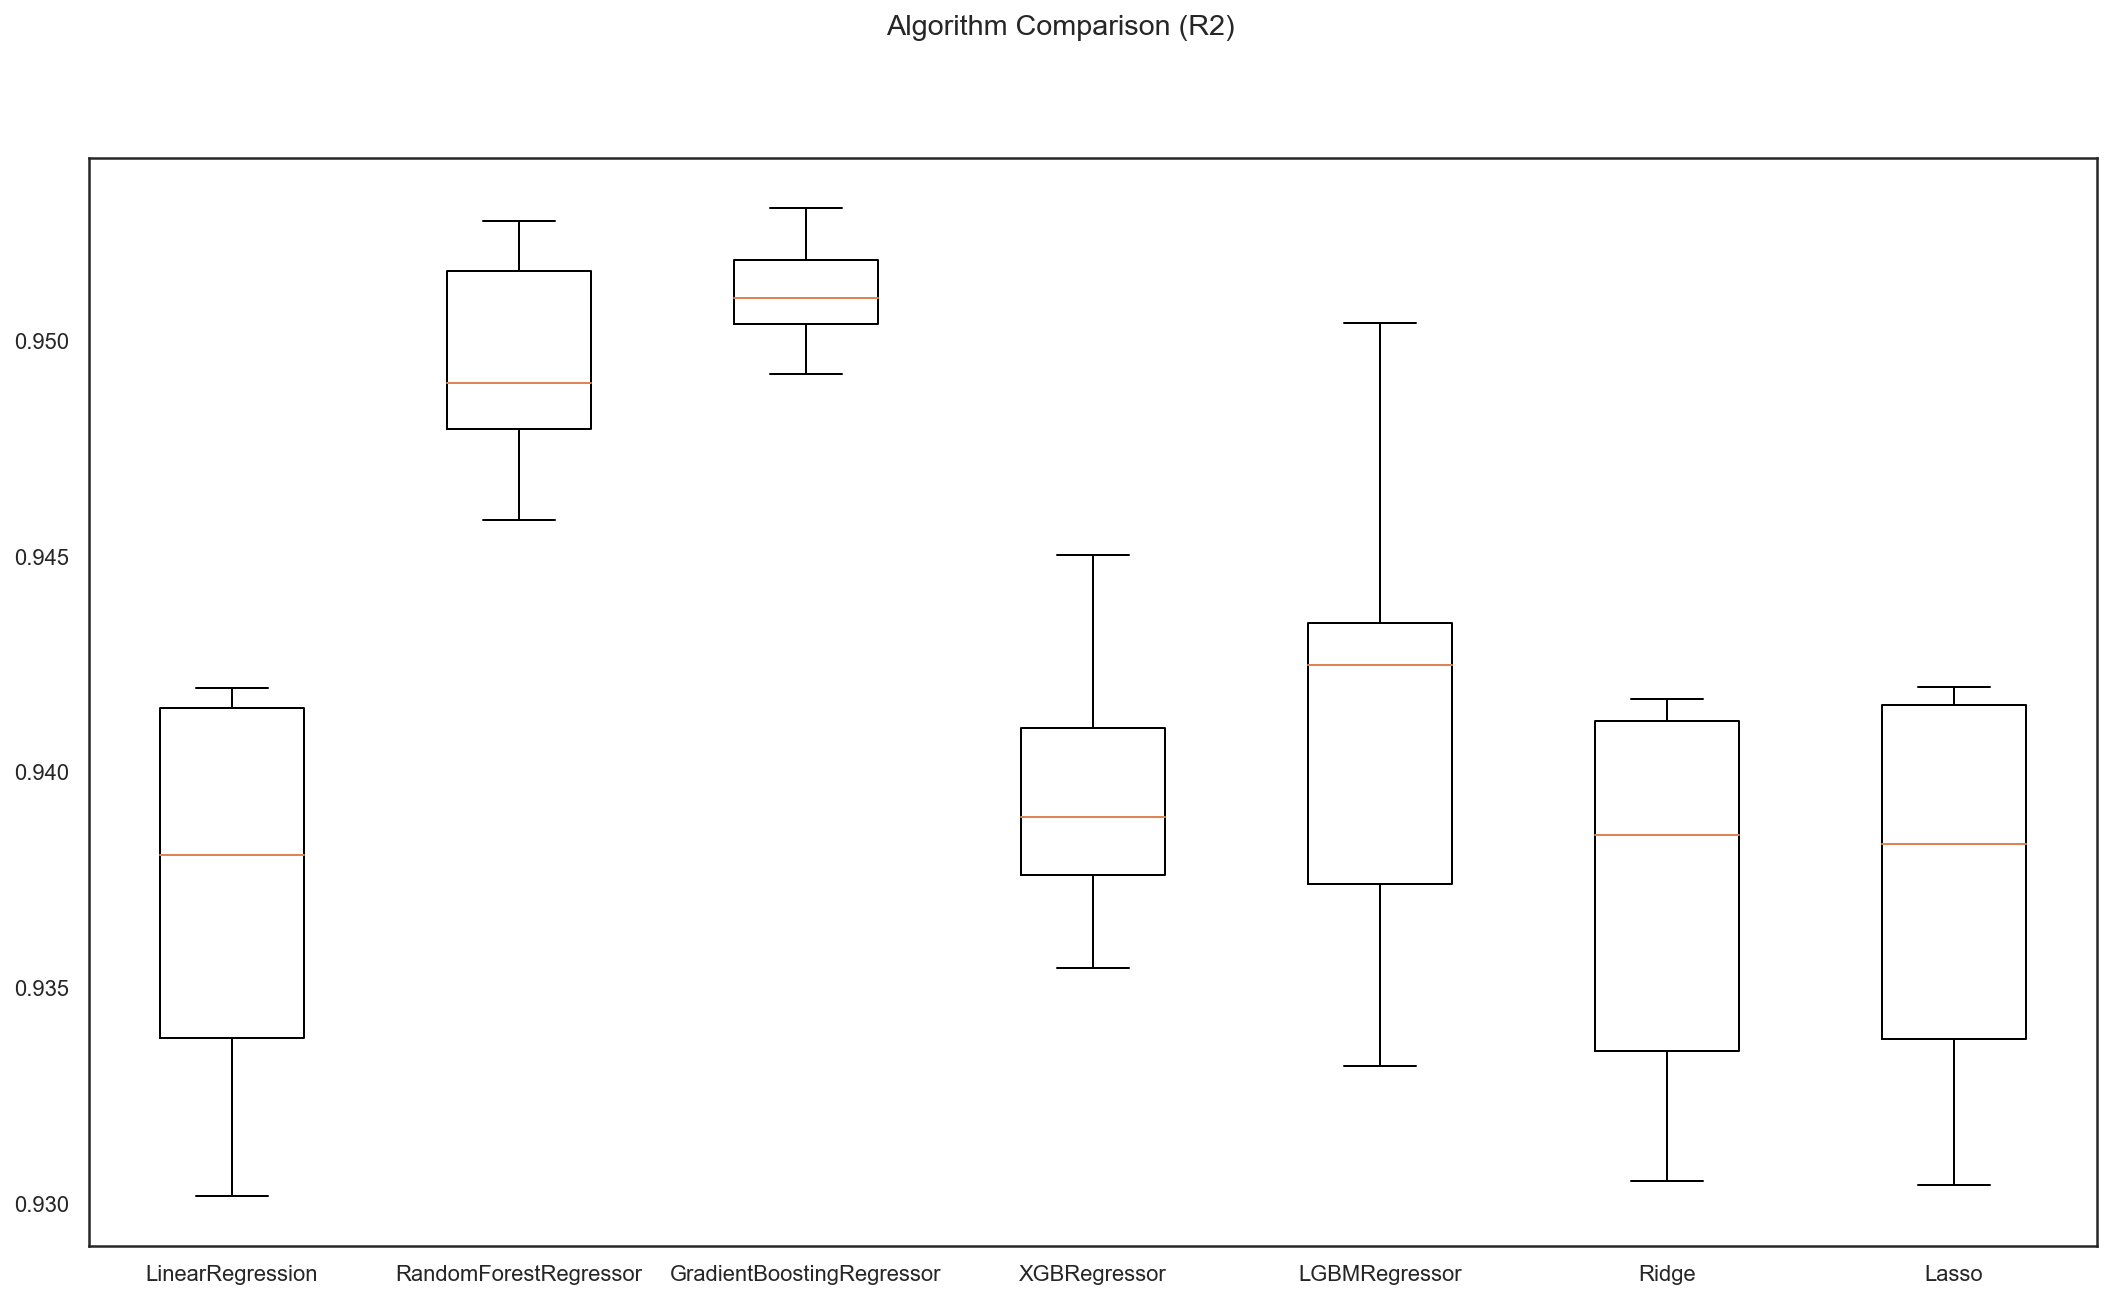

In [103]:
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Algorithm Comparison (R2)')
ax = fig.add_subplot(111)
plt.boxplot(results_r2)
ax.set_xticklabels(names)
plt.show()

In [104]:
# RMSE는 작고 R2는 1에 가까운 모델은.... GradientBoostingRegressor인 것 같다..!

## GridSearchCV

### GradientBoostingRegressor

In [25]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [80, 90, 100, 110],
               'max_features': [2, 3, 10, 30],
               'n_estimators': [100, 200, 300, 1000]},
]
reg = GradientBoostingRegressor(random_state=4)
grid_search = GridSearchCV(reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print('best params: ', grid_search.best_params_, "\n")
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

best params:  {'max_depth': 80, 'max_features': 10, 'n_estimators': 1000} 

0.849509101862381 {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
0.84951688511011 {'max_depth': 80, 'max_features': 2, 'n_estimators': 200}
0.8495168853222589 {'max_depth': 80, 'max_features': 2, 'n_estimators': 300}
0.8495168853222796 {'max_depth': 80, 'max_features': 2, 'n_estimators': 1000}
0.9003691255216755 {'max_depth': 80, 'max_features': 3, 'n_estimators': 100}
0.9003747318873797 {'max_depth': 80, 'max_features': 3, 'n_estimators': 200}
0.9003747320363983 {'max_depth': 80, 'max_features': 3, 'n_estimators': 300}
0.9003747320364106 {'max_depth': 80, 'max_features': 3, 'n_estimators': 1000}
0.9404110041181031 {'max_depth': 80, 'max_features': 10, 'n_estimators': 100}
0.9404123828802013 {'max_depth': 80, 'max_features': 10, 'n_estimators': 200}
0.9404123829180389 {'max_depth': 80, 'max_features': 10, 'n_estimators': 300}
0.9404123829180409 {'max_depth': 80, 'max_features': 10, 'n_estimators': 10

In [27]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.28690538e-02, 2.21122085e-03, 6.36766057e-03, 3.40755906e-03,
       2.21444608e-03, 2.52695556e-03, 2.92172977e-01, 2.19604540e-03,
       1.49719946e-02, 5.76893530e-04, 5.60538413e-03, 6.22222130e-04,
       2.93136888e-03, 1.66543280e-03, 1.94832946e-01, 3.41148386e-03,
       1.85140890e-03, 7.57645608e-02, 3.38991695e-02, 5.84884876e-03,
       1.00170573e-04, 1.13753176e-03, 7.86769362e-04, 7.23290968e-04,
       5.66343697e-04, 5.81588940e-04, 1.18529994e-03, 1.03942204e-03,
       3.38580254e-03, 1.02221482e-03, 2.49882412e-02, 1.29663282e-01,
       2.19105587e-03, 7.28920771e-02, 1.23278758e-02, 1.42782530e-02,
       4.67888690e-03, 5.84462426e-04, 9.24184046e-04, 9.95615097e-04])

In [115]:
# 중요 특성 확인
sorted(zip(feature_importances, feature_columns), reverse=True)

[(0.27605385, 'EducationField_Marketing'),
 (0.26747406, 'PerformanceRating'),
 (0.15365866, 'StockOptionLevel'),
 (0.0852201, 'JobLevel'),
 (0.04731054, 'TotalWorkingYears'),
 (0.040823575, 'RelationshipSatisfaction'),
 (0.039050926, 'TrainingTimesLastYear'),
 (0.022762772, 'NumCompaniesWorked'),
 (0.017602844, 'PercentSalaryHike'),
 (0.009528812, 'JobRole_LaboratoryTechnician'),
 (0.0046946276, 'Age'),
 (0.003070459, 'JobRole_ManufacturingDirector'),
 (0.0022955923, 'WorkLifeBalance'),
 (0.002079985, 'JobRole_SalesExecutive'),
 (0.0019623963, 'MaritalStatus_Divorced'),
 (0.0016359771, 'EducationField_LifeSciences'),
 (0.00159784, 'JobRole_HumanResources'),
 (0.0015905519, 'BusinessTravel'),
 (0.0015537717, 'JobRole_Manager'),
 (0.0014447386, 'Gender_Male'),
 (0.0014274683, 'YearsSinceLastPromotion'),
 (0.0013954405, 'Education'),
 (0.0012548909, 'Gender_Female'),
 (0.0012420642, 'EnvironmentSatisfaction'),
 (0.0012365318, 'JobInvolvement'),
 (0.0012232317, 'EducationField_HumanResour

In [29]:
final_model = grid_search.best_estimator_
final_pred_test = final_model.predict(X_test)
gb_final_rmse_test = np.sqrt(mean_squared_error(y_test, final_pred_test))
gb_final_rmse_test

1076.3043516490247

In [30]:
# 95% 신뢰구간 확인
from scipy import stats

confidence = 0.95
squared_errors = (final_pred_test - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([ 971.66983869, 1171.63127278])

In [114]:
best_cols = pd.Series(feature_importances, index=feature_columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

EducationField_Marketing         0.276054
PerformanceRating                0.267474
StockOptionLevel                 0.153659
JobLevel                         0.085220
TotalWorkingYears                0.047311
RelationshipSatisfaction         0.040824
TrainingTimesLastYear            0.039051
NumCompaniesWorked               0.022763
PercentSalaryHike                0.017603
JobRole_LaboratoryTechnician     0.009529
Age                              0.004695
JobRole_ManufacturingDirector    0.003070
WorkLifeBalance                  0.002296
JobRole_SalesExecutive           0.002080
MaritalStatus_Divorced           0.001962
EducationField_LifeSciences      0.001636
JobRole_HumanResources           0.001598
BusinessTravel                   0.001591
JobRole_Manager                  0.001554
Gender_Male                      0.001445
dtype: float32

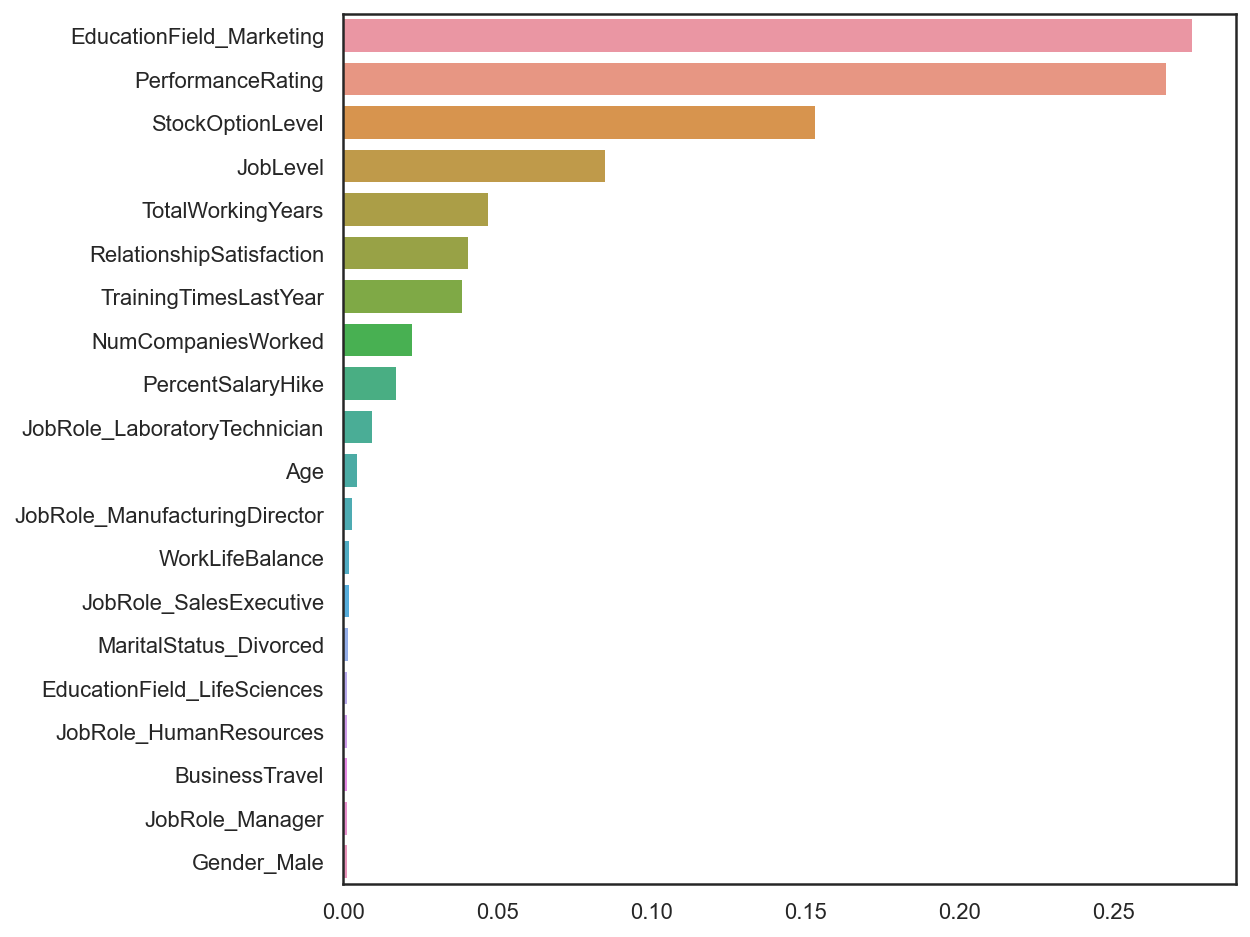

In [116]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()